# Preàmbul

## Càrrega de llibreries

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from scipy.stats import lognorm
# from statsmodels.graphics.mosaicplot import mosaic
from matplotlib.colors import LinearSegmentedColormap

## Càrrega de dades

Llegim el fitxer de dades en format CSV, té 119.390 files i 32 columnes:

In [87]:
data = pd.read_csv('hotel_bookings.csv')
print(f'Shape of the data: {data.shape}')

Shape of the data: (119390, 32)


## Inspecció de dades

Primer inspeccionarem les dades usant la funció describe() inclosa a pandas.

L'explicació de cada variable es pot trobar a l'article en el qual es descriu aquest conjunt de dades de forma detallada, tot i que els noms de les variables són gairebé auto-explicatius:

In [88]:
data.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


## Neteja de dades

Podem observar alguns valors estranys per a algunes variables, per exemple:

1) Un màxim de 55 en adults
2) Un màxim de 10 en children (incloent valors perduts)
3) Un màxim de 10 en babies
4) Valors negatius en el cost promig per dia (adr) o molt elevats

In [89]:
n0 = data.shape[0]
print(f'Number of original rows: {n0}')

# Cleaning adults
data = data[data.adults < 10]

# Cleaning children
data = data[(data.children < 4) & (data.babies < 4)]

# Cleaning adr
data = data[(data.adr >= 0) & (data.adr < 1000)]

n1 = data.shape[0]
print(f'Number of cleaned rows: {n1} ({n1-n0})')

Number of original rows: 119390
Number of cleaned rows: 119368 (-22)


## Visualització de dades

L'histograma ara sí que ens aporta informació rellevant.

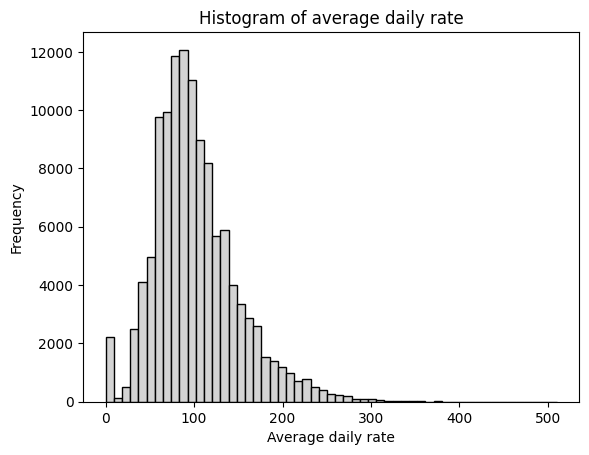

In [90]:
plt.hist(data.adr, bins=55, color='lightgray', edgecolor='black')
plt.title('Histogram of average daily rate')
plt.xlabel('Average daily rate')
plt.ylabel('Frequency')
plt.show()

Shape: 0.46579965586157046, Location: 0, Scale: 93.59865870116076
Mean: 103.4882123452164, Median: 95.0, Mode: 62.0


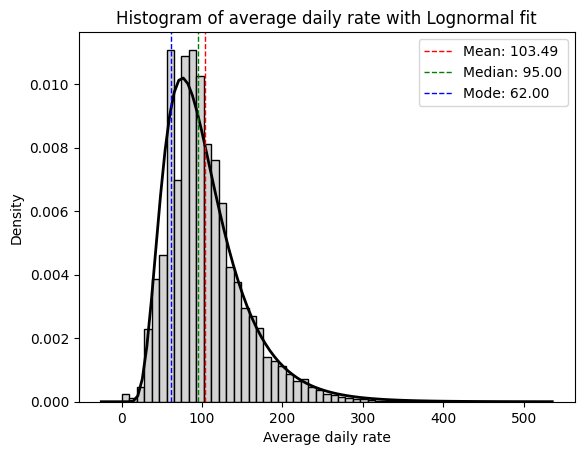

In [91]:
# Clean data with adr equal to 0 (to avoid log(0))
data = data[data.adr > 0]

# Calculate mean, median, and mode
mean_adr = data.adr.mean()
median_adr = data.adr.median()
mode_adr = data.adr.mode()[0]

# Fit lognormal distribution
shape, loc, scale = lognorm.fit(data.adr, floc=0)
print(f'Shape: {shape}, Location: {loc}, Scale: {scale}')
print(f'Mean: {mean_adr}, Median: {median_adr}, Mode: {mode_adr}')

# Plot histogram with lognormal fit
plt.hist(data.adr, bins=55, color='lightgray', edgecolor='black', density=True)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, p, 'k', linewidth=2)

# Plot mean, median, and mode
plt.axvline(mean_adr, color='r', linestyle='dashed', linewidth=1, label=f'Mean: {mean_adr:.2f}')
plt.axvline(median_adr, color='g', linestyle='dashed', linewidth=1, label=f'Median: {median_adr:.2f}')
plt.axvline(mode_adr, color='b', linestyle='dashed', linewidth=1, label=f'Mode: {mode_adr:.2f}')

plt.title('Histogram of average daily rate with Lognormal fit')
plt.xlabel('Average daily rate')
plt.ylabel('Density')
plt.legend()
plt.show()

Com es pot observar, les dades reals i les simulades estan a prop del que podria ser una distribució lognormal.

De totes maneres, amb l'objectiu d'experimentar amb un conjunt de dades el més net possible procedirem a:

1) eliminar les estades de 0 dies
2) eliminar les estades a cost 0
3) eliminar les estades sense persones
4) substituir els NA de la variable children per 0

In [92]:
# Combined cleaning step
data = data[(data.stays_in_weekend_nights + data.stays_in_week_nights > 0) & 
    (data.adr > 0) & 
    (data.adults + data.children + data.babies > 0)]

# Cleaning children
data['children'] = data['children'].fillna(0)

n2 = data.shape[0]
print(f'Number of cleaned rows: {n2} ({n2-n1})')

Number of cleaned rows: 117391 (-1977)


# Anàlisi de dades

Per a fer més senzill l'anàlisi, crearem unes noves columnes amb les dades que necessitem, reagrupant les dades que ja tenim:
1. Date: Data d'arribada
2. Total nights: Total de nits allotjats
3. Total customers: Total de clients
4. Total cost: Cost total de l'estada

In [93]:
# Date column
data['date'] = pd.to_datetime(data['arrival_date_year'].astype(str) + '-' + data['arrival_date_month'] + '-' + data['arrival_date_day_of_month'].astype(str))

# Total nights
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']

# Total customers
data['total_customers'] = data['adults'] + data['children'] + data['babies']

# Total cost
data['total_cost'] = data['adr'] * data['total_nights']

## Pie chart of repeated reservations by market segment

The first data to compare is the market segment of the repeated reservations. We will create a pie chart to show the distribution of repeated reservations by market segment.

For that, we will filter the data to keep only the repeated reservations (i.e., `previous_bookings_not_canceled` > 0) and group by the market segment, counting the number of reservations in each sector (number of reservations repeated by market segment).

The less frequent sectors will be grouped into a new sector called "Other".

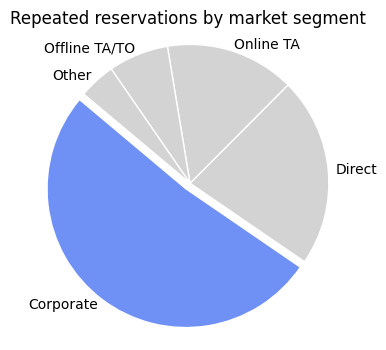

In [117]:
# Create a copy of the data
pie_data = data.copy()

# Replace the sectors "Complementary", "Aviation", and "Groups" with "Other"
pie_data['market_segment'] = pie_data['market_segment'].replace(['Complementary', 'Aviation', 'Groups'], 'Other')

# Filter the data
pie_data = pie_data[pie_data['previous_bookings_not_canceled'] > 0]

# Group by market sector and count
pie_data = pie_data['market_segment'].value_counts()

# Pie chart
plt.figure(figsize=(4, 4))
plt.pie(pie_data,
        labels=pie_data.index,
        startangle=140,
        colors=['#6F90F4', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey'],
        # He usat #6F90F4 enlloc de cornflowerblue per a poder utilitzar el mateix color exacte per al text
        wedgeprops={'edgecolor': 'white'},
        explode=(0.05, 0, 0, 0, 0),
        labeldistance=1.05)
plt.axis('equal')
plt.title('Repeated reservations by market segment', fontsize=12)
plt.savefig('figures/pie_chart.png')
plt.show()

**Els clients corporatius són els que més sovint repeteixen les seves reserves**, per tant són els que més fidelitat tenen amb l'hotel. A més, són fàcilment identificables i poden ser objecte d'una estratègia de fidelització específica.

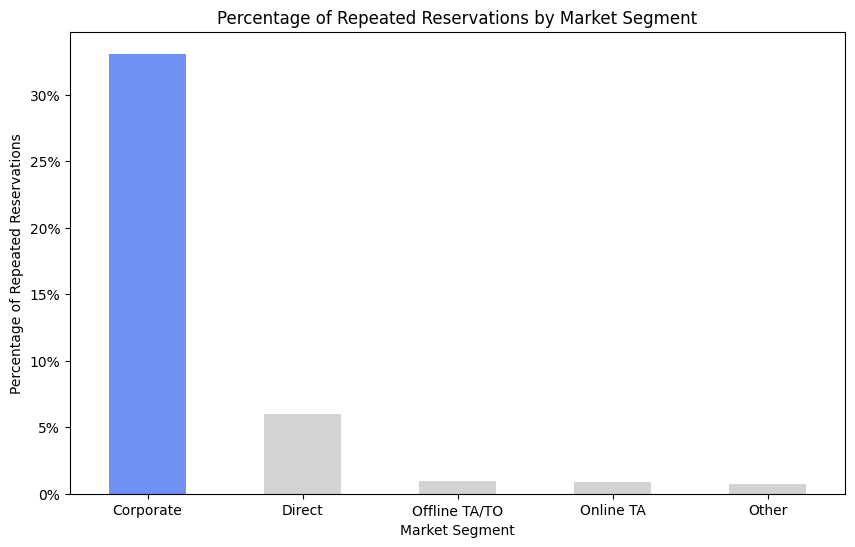

In [95]:
# Create a copy of the data
bar_data_total = data.copy()
bar_data_repeated = pie_data.copy() # As we are going to use the data from the previous pie chart, the data is already filtered and grouped by market sector

# Replace the sectors "Complementary", "Aviation", and "Groups" with "Other"
bar_data_total['market_segment'] = bar_data_total['market_segment'].replace(['Complementary', 'Aviation', 'Groups'], 'Other')

# Group by market sector and count
bar_data_total = bar_data_total['market_segment'].value_counts()

# Calculate the percentage of repeat customers by market sector
percentage_repeat_customers = bar_data_repeated / bar_data_total * 100

# Sort the percentages in descending order
percentage_repeat_customers = percentage_repeat_customers.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(10, 6))
colors = ['#6F90F4' if segment == 'Corporate' else 'lightgrey' for segment in percentage_repeat_customers.index]
percentage_repeat_customers.plot(kind='bar', color=colors)
plt.title('Percentage of Repeated Reservations by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Percentage of Repeated Reservations')
plt.xticks(rotation=0)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.show()

## Heatmap

Having seen the importance of Corporate clients, we will now explore the distribution of these clients over time. We will create a heatmap to show the number of reservations made by Corporate clients by month and year.

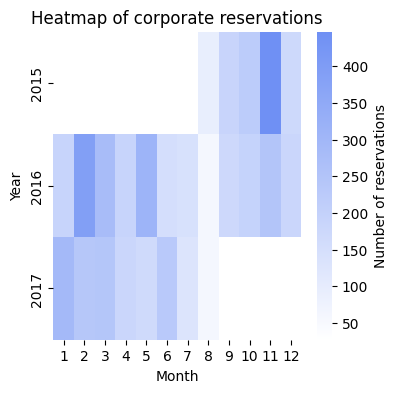

In [116]:
# Create a copy of the data
heatmap_data = data.copy()

# Filter the data
heatmap_data = heatmap_data[heatmap_data['market_segment'] == 'Corporate']

# Map month names to numbers
month_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
heatmap_data['arrival_date_month'] = heatmap_data['arrival_date_month'].map(month_mapping)

# Heat map
heatmap_data = heatmap_data.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='reserves')

heatmap_data = heatmap_data.pivot(index='arrival_date_year', columns='arrival_date_month', values='reserves')

# Create the heatmap as a gradient from white to #6F90F4 blue
cmap = LinearSegmentedColormap.from_list('custom', ['white', '#6F90F4'])

plt.figure(figsize=(4, 4))
sns.heatmap(heatmap_data, cmap=cmap)
plt.title('Heatmap of corporate reservations', fontsize=12)
plt.xlabel('Month')
plt.xticks(rotation=0)
plt.ylabel('Year')
colorbar = plt.gca().collections[0].colorbar
colorbar.set_label('Number of reservations')
plt.savefig('figures/heatmap.png')
plt.show()

Al contrari que els viatges de plaer, **els viatges de negocis tenen una distribució més uniforme al llarg de l'any**, a excepció de l'agost, on es registren menys reserves. Això pot ser degut a que moltes empreses tanquen durant aquest mes per tant no hi ha tants viatges de negocis.

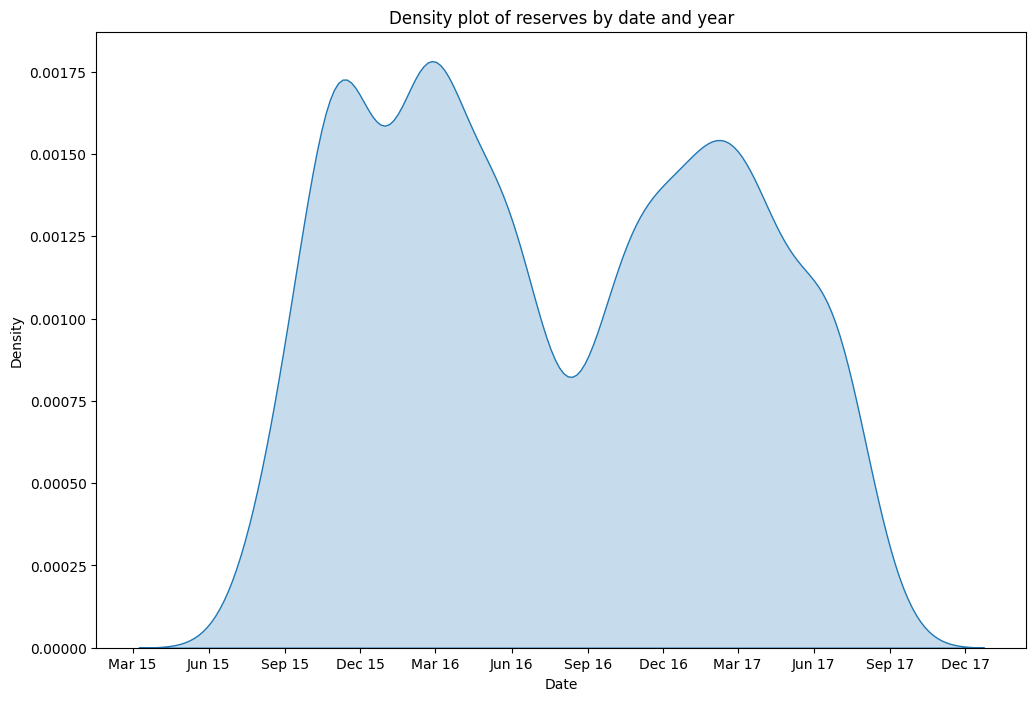

In [97]:
# Create a copy of the data
corporate_data = data.copy()

# Filter the data
corporate_data = corporate_data[corporate_data['market_segment'] == 'Corporate']

# Density plot
plt.figure(figsize=(12, 8))
sns.kdeplot(data=corporate_data, x='date', fill=True)
plt.title('Density plot of reserves by date and year')
plt.xlabel('Date')
plt.ylabel('Density')
# Format x-axis to show month and year in MMM YY format
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %y'))
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=3))
plt.xticks(rotation=0)
plt.show()

In [98]:
# Calculate the average values for the columns
average_corporate_customers = corporate_data[['lead_time', 'total_nights', 'total_customers', 'total_cost','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','adr','required_car_parking_spaces','total_of_special_requests']].mean()

# Calculate the mode for the categorical columns
mode_corporate_customers = corporate_data[['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status', 'reservation_status_date']].mode().iloc[0]

print('Average values for Corporate customers:')
print(average_corporate_customers)
print('\nMode for Corporate customers:')
print(mode_corporate_customers)

# Select relevant columns for the plot
columns = ['lead_time', 'total_nights', 'total_customers', 'total_cost', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
parallel_data = corporate_data[columns]

# Plot the data
fig = px.parallel_coordinates(parallel_data, color='total_cost',
                              labels = {'lead_time': 'Lead Time', 'total_nights': 'Total Nights', 'total_customers': 'Total Customers', 'total_cost': 'Total Cost', 'adr': 'ADR', 'required_car_parking_spaces': 'Required Parking Spaces', 'total_of_special_requests': 'Total Special Requests'},
                              color_continuous_scale=px.colors.diverging.Tealrose)
fig.show()

Average values for Corporate customers:
lead_time                       22.296545
total_nights                     2.090019
total_customers                  1.250096
total_cost                     148.558591
stays_in_weekend_nights          0.435317
stays_in_week_nights             1.654702
adults                           1.239347
children                         0.009405
babies                           0.001344
adr                             70.470950
required_car_parking_spaces      0.113052
total_of_special_requests        0.229367
dtype: float64

Mode for Corporate customers:
hotel                      City Hotel
meal                               BB
market_segment              Corporate
distribution_channel        Corporate
reserved_room_type                  A
assigned_room_type                  A
deposit_type               No Deposit
customer_type               Transient
reservation_status          Check-Out
reservation_status_date    2016-12-07
Name: 0, dtype: object


## Bar plot

Finally we will see how corporate customers are the ones more likely to book on week days, while Aviation is the ones more likely to book on weekends.

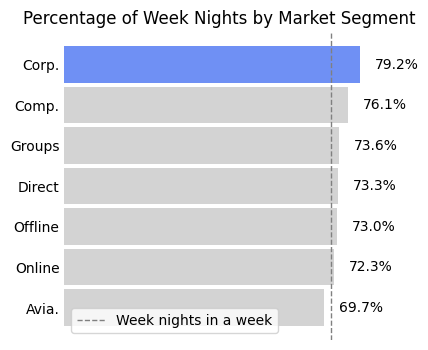

In [115]:
# Create a copy of the data
bar_data = data.copy()

# Group the data by market segment
weekend_nights = bar_data.groupby('market_segment')['stays_in_weekend_nights'].sum()
week_nights = bar_data.groupby('market_segment')['stays_in_week_nights'].sum()

# Calculate the total number of nights and the percentage of weekend and week nights
total_nights = weekend_nights + week_nights
week_nights_percentage = week_nights / total_nights * 100

# Sort the percentages in descending order
week_nights_percentage = week_nights_percentage.sort_values(ascending=True)

# Reduce the index names
week_nights_percentage.index = ['Avia.', 'Online', 'Offline', 'Direct', 'Groups', 'Comp.', 'Corp.']

# Plot the data
fig, ax = plt.subplots(figsize=(4, 4))
ind = range(len(week_nights_percentage))
width = .9
colors = ['lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', 'lightgrey', '#6F90F4']
p = plt.barh(ind, week_nights_percentage, height=width, color=colors)

# Add the percentage values on the right of each bar
for i, v in enumerate(week_nights_percentage):
    plt.text(v + 4, i, f'{v:.1f}%', va='center')

plt.axvline(x=500/7, color='grey', linestyle='--', linewidth=1, label='Week nights in a week')
plt.title('Percentage of Week Nights by Market Segment', fontsize=12
          )
plt.yticks(ind, week_nights_percentage.index)
ax.tick_params(axis='y', which='both', length=0)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.legend(loc='lower left')
ax.set(frame_on=False)
ax.xaxis.set_visible(False)  # Remove x-axis
plt.savefig('figures/bar_chart.png')
plt.show()


Malgrat gairebé tots els segments tenir una major proporció de nits de setmana que de cap de setmana, les nits entre setmana són més freqüents en el segment corporatiu, per tant podria ser interessant oferir promocions o descomptes per a aquest tipus de clients en dies laborables. A més seràn fàcils de contactar ja que són clients que ja han reservat amb anterioritat.

In [100]:
# Prepare data for mosaic plot
mosaic_data = data.groupby(['market_segment']).agg({'stays_in_weekend_nights': 'sum', 'stays_in_week_nights': 'sum'}).stack().reset_index()
mosaic_data.columns = ['market_segment', 'night_type', 'nights']
mosaic_dict = {(row['market_segment'], row['night_type']): row['nights'] for _, row in mosaic_data.iterrows()}

# # Plot mosaic plot
# fig, ax = plt.subplots(figsize=(10, 6))
# mosaic(mosaic_dict, ax=ax, title='Mosaic plot of Week Nights and Weekend Nights by Market Segment')
# plt.show()

# Descartem usar el plot en mosaic ja que no ens aporta cap informació addicional respecte al plot de barres, i desvistua els segments amb menys dades.